In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

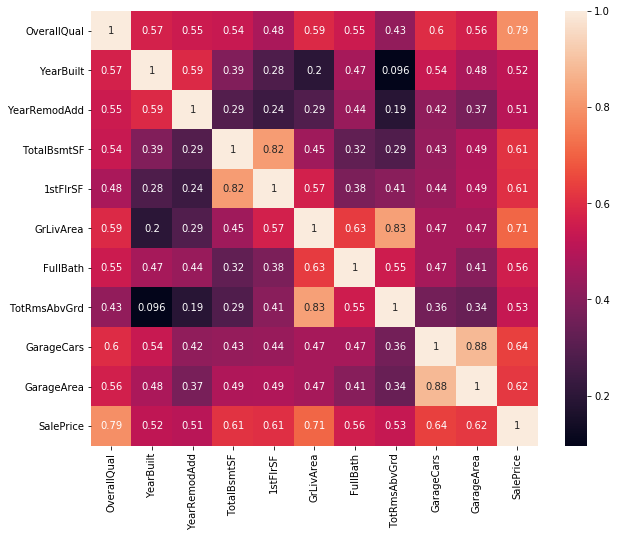

In [5]:
import seaborn as sns
corr0 = train.corr()
corr0 = train[corr0.index[abs(corr0['SalePrice'])>0.5]].corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr0, annot = True)

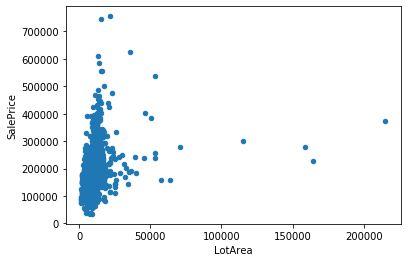

In [6]:
train.plot.scatter(y = 'SalePrice', x = 'LotArea')

In [9]:
train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [7]:
# Remove outliers
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [8]:
train.shape, test.shape

((1457, 81), (1459, 80))

In [9]:
y_train = train.SalePrice

In [10]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print("length =", len(corr.SalePrice))
print(corr.SalePrice)

length = 38
SalePrice        1.000000
OverallQual      0.797639
GrLivArea        0.735021
TotalBsmtSF      0.650991
GarageCars       0.641062
1stFlrSF         0.631243
GarageArea       0.629252
FullBath         0.563205
TotRmsAbvGrd     0.538157
YearBuilt        0.524197
YearRemodAdd     0.507618
GarageYrBlt      0.488114
MasVnrArea       0.483300
Fireplaces       0.469358
BsmtFinSF1       0.408838
LotFrontage      0.370584
WoodDeckSF       0.324304
2ndFlrSF         0.321214
OpenPorchSF      0.320552
HalfBath         0.285227
LotArea          0.267179
BsmtFullBath     0.227903
BsmtUnfSF        0.215033
BedroomAbvGr     0.169050
ScreenPorch      0.111627
PoolArea         0.099562
MoSold           0.046961
3SsnPorch        0.044657
BsmtFinSF2      -0.011238
BsmtHalfBath    -0.016730
MiscVal         -0.021153
Id              -0.021264
LowQualFinSF    -0.025555
YrSold          -0.028981
OverallCond     -0.078223
MSSubClass      -0.083758
EnclosedPorch   -0.128457
KitchenAbvGr    -0.135853


In [11]:
train.drop(['SalePrice'], axis = 1, inplace = True)

In [12]:
train.shape

(1457, 80)

In [13]:
df_train_test = pd.concat([train, test], axis=0)
df_train_test.shape

(2916, 80)

In [14]:
df_train_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
train_test_id = df_train_test["Id"]
df_train_test = df_train_test.drop(['Id'], axis = 1)

In [16]:
num_features = df_train_test.select_dtypes(exclude = ['object']).columns
cat_features = df_train_test.select_dtypes(include = ['object']).columns

In [17]:
len(cat_features), len(num_features)

(43, 36)

In [18]:
num_train_test = df_train_test[num_features]
cat_train_test = df_train_test[cat_features]

In [19]:
num_train_test.isna().sum().sort_values(ascending = False)

LotFrontage      485
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallCond        0
YearBuilt          0
YearRemodAdd       0
OverallQual        0
GrLivArea          0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
YrSold             0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MSSubClass         0
dtype: int64

In [20]:
num_train_test = num_train_test.drop(["LotFrontage", "GarageYrBlt"], axis = 1)

In [21]:
num_train_test.shape

(2916, 34)

In [22]:
num_train_test = num_train_test.fillna(num_train_test.median())

In [23]:
sum(num_train_test.isna().sum())

0

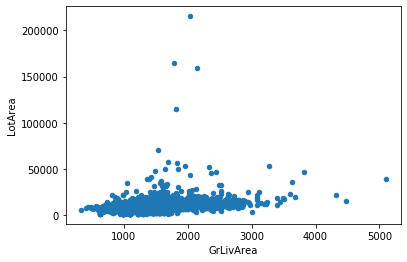

In [24]:
num_train_test.plot.scatter(y = 1, x = 'GrLivArea')

In [25]:
cat_train_test.isna().sum().sort_values(ascending = False)

PoolQC           2907
MiscFeature      2811
Alley            2718
Fence            2345
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition1          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
RoofStyle           0
Condition2          0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
CentralAir          0
SaleCondition       0
dtype: int64

In [26]:
cat_train_test = cat_train_test.drop(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis = 1)

In [27]:
cat_train_test.shape

(2916, 38)

In [28]:
for col in ('MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'):
    cat_train_test[col] = cat_train_test[col].fillna(cat_train_test[col].mode()[0])

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    cat_train_test[col] = cat_train_test[col].fillna('None')

In [30]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    cat_train_test[col] = cat_train_test[col].fillna('None')

In [31]:
sum(cat_train_test.nunique())

242

In [32]:
dummy = pd.get_dummies(cat_train_test)

In [33]:
dummy.shape

(2916, 242)

In [34]:
df_final = pd.concat([df_train_test, dummy], axis = 1)
df_final.drop(cat_features, inplace = True, axis = 1)
df_final.drop(num_features, inplace = True, axis = 1)
df_final = pd.concat([df_final, num_train_test], axis = 1)

In [36]:
df_final.shape, 242 + len(num_features) - 2 #(features discarded)

((2916, 276), 276)

In [37]:
sum(df_final.isna().sum())

0

In [38]:
df_train = df_final.iloc[0:1457]
df_test = df_final.iloc[1457:]

In [39]:
df_train.shape, df_test.shape

((1457, 276), (1459, 276))

In [40]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [41]:
model1 = RandomForestRegressor(random_state = 23)
model2 = LGBMRegressor(random_state = 23)
model3 = XGBRegressor(random_state = 23)

In [42]:
model1.fit(df_train, y_train)
model2.fit(df_train, y_train)
model3.fit(df_train, y_train)

[23:59:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=23,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
y_pred1 = model1.predict(df_test)
y_pred2 = model2.predict(df_test)
y_pred3 = model3.predict(df_test)

In [45]:
submission1 = pd.DataFrame({'Id':train_test_id[1457:], 'SalePrice':y_pred1})
submission2 = pd.DataFrame({'Id':train_test_id[1457:], 'SalePrice':y_pred2})
submission3 = pd.DataFrame({'Id':train_test_id[1457:], 'SalePrice':y_pred3})

In [46]:
submission1.to_csv('C:/Users/Dhruvil/Desktop/sub1.csv', index = False)
submission2.to_csv('C:/Users/Dhruvil/Desktop/sub2.csv', index = False)
submission3.to_csv('C:/Users/Dhruvil/Desktop/sub3_.csv', index = False)